<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Data Mining</b></center>
<center><b><h1>Dataset- Online Retail- PCA</b></center> 
<center><b><h1>Ronit Savaliya | 23010101247</b></center>    
<pre>

<h3>Step 1: Load the Dataset</h3>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('datasets/OnlineRetail.csv', encoding='ISO-8859-1')

In [37]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


<h3>Step 2: Clean the Data</h3>
<h4>Drop non-numeric columns for PCA:</h4>

In [39]:
x = df.drop(columns=['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country'])

<h3>Step 3: Standardize (Mean = 0, Std = 1)</h3>

In [41]:
x = x.fillna(x.mean())

x_meaned=x-np.mean(x, axis=0)
print(x_meaned[:5])

   Quantity  UnitPrice  CustomerID
0  -3.55225  -2.061114  2562.30943
1  -3.55225  -1.221114  2562.30943
2  -1.55225  -1.861114  2562.30943
3  -3.55225  -1.221114  2562.30943
4  -3.55225  -1.221114  2562.30943


<h3>Step 4: Compute Covariance Matrix</h3>

In [43]:
cov_mat=np.cov(x_meaned, rowvar=False)
cov_mat

array([[ 4.75593914e+04, -2.60587613e+01, -1.15166147e+03],
       [-2.60587613e+01,  9.36246916e+03, -4.06581216e+02],
       [-1.15166147e+03, -4.06581216e+02,  2.20447072e+06]])

<h3>Step 5: Compute Eigenvalues and Eigenvectors</h3>
<h4>Sort eigenvalues and eigenvectors in descending order:</h4>

In [45]:
eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)

print("Eigen Values:\n", eigen_values)
print("Eigen Vectors:\n", eigen_vectors)

# argsort (sort by index)
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigen_values = eigen_values[sorted_index]
sorted_eigen_vectors = eigen_vectors[:, sorted_index]

print("Index:\n", sorted_index)
print("Eigen Values:\n", eigen_values)
print("Eigen Vectors:\n", eigen_vectors)

Eigen Values:
 [   9362.37578651   47558.79456675 2204471.40580767]
Eigen Vectors:
 [[-6.87815061e-04  9.99999621e-01 -5.33937617e-04]
 [-9.99999746e-01 -6.87914040e-04 -1.85215062e-04]
 [-1.85582295e-04  5.33810088e-04  9.99999840e-01]]
Index:
 [2 1 0]
Eigen Values:
 [   9362.37578651   47558.79456675 2204471.40580767]
Eigen Vectors:
 [[-6.87815061e-04  9.99999621e-01 -5.33937617e-04]
 [-9.99999746e-01 -6.87914040e-04 -1.85215062e-04]
 [-1.85582295e-04  5.33810088e-04  9.99999840e-01]]


In [46]:
print(x.isnull().sum())  # shows count of NaNs in each column

Quantity      0
UnitPrice     0
CustomerID    0
dtype: int64


<h3>Step 6: Project Data onto Top K Principal Components (e.g., 2)</h3>

In [48]:
k = 2
eigenvector_subset = sorted_eigen_vectors[:, 0:k]
eigenvector_subset.shape

x_reduced = np.dot(x_meaned, eigenvector_subset)
x_reduced

array([[ 2.56231130e+03, -2.18304371e+00],
       [ 2.56231114e+03, -2.18362156e+00],
       [ 2.56231019e+03, -1.83182051e-01],
       ...,
       [-2.60768710e+03, -6.94394177e+00],
       [-2.60768710e+03, -6.94394177e+00],
       [-2.60768672e+03, -7.94449172e+00]])

<h3>Step 7: Plot the PCA Result</h3>

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16260\2782629423.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_reduced[:,0], x_reduced[:,1], cmap='viridis')


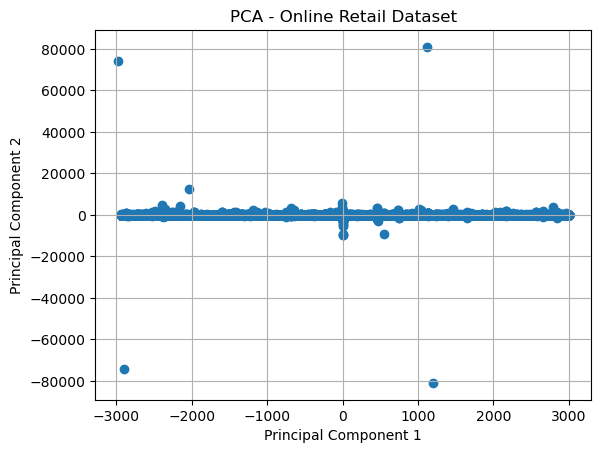

In [50]:
plt.scatter(x_reduced[:,0], x_reduced[:,1], cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - Online Retail Dataset")
plt.grid(True)
plt.show()

In [63]:
# Loadings: each column = PC, each row = feature
loadings = eigen_vectors[:, :2]

# Match with feature names
features = ['Quantity', 'UnitPrice']

# Create readable table
for i, feature in enumerate(features):
    print(f"{feature}: PC1 = {loadings[i,0]:.4f}, PC2 = {loadings[i,1]:.4f}")


Quantity: PC1 = -0.0007, PC2 = 1.0000
UnitPrice: PC1 = -1.0000, PC2 = -0.0007
